In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv("Brownlow Full Database.csv")

def calculate_margin(row):
    if(row['Team'] == row['Home_Team']):
        return row['Home_Score'] - row['Away_Score']
    else:
        return row['Away_Score'] - row['Home_Score']
    
df = df.iloc[:, :-4]
df['Winning_Margin'] = df.apply(lambda x: calculate_margin(x), axis=1)
df = df.iloc[:, 10:]

def sample_no_votes(row):
    if row['Brownlow_Votes'] > 0:
        return True
    else:
        return True if random.randint(0, 100) < 10 else False

    
df['keep'] = df.apply(lambda x: sample_no_votes(x), axis=1)
df_balanced = df.drop(df[df.keep == False].index)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
X = df_balanced.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions', # values not recorded in 2012 data
    'Brownlow_Votes',
    'keep'
], axis=1).values

y = df_balanced['Brownlow_Votes'].fillna(0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 1.35274367, -0.01204173,  0.81423079, ...,  0.51477653,
         1.41865785,  0.92861118],
       [-1.64388585,  0.91538517, -0.4361022 , ..., -1.11527971,
        -0.44356198, -0.09248675],
       [-0.89472847, -1.12495402, -1.23176866, ..., -1.02948727,
        -1.60363335, -0.9093651 ],
       ...,
       [-1.08201782,  0.54441441, -0.32243557, ...,  0.08581436,
        -0.87095669, -1.70355238],
       [ 3.78750515, -0.3830125 ,  2.06456379, ...,  0.42898409,
         3.1892931 ,  1.2462861 ],
       [-0.33286044, -0.19752711, -0.32243557, ..., -0.25735537,
        -0.29092101, -0.3193974 ]])

In [5]:
lrc = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

#Train the model using the training sets
lrc.fit(X_train, y_train)

#Predict the response for test dataset
pred = lrc.predict(X_test)

Normalized confusion matrix
[[0.94970162 0.02728048 0.01790281 0.00511509]
 [0.33941606 0.22262774 0.20072993 0.23722628]
 [0.21886792 0.18490566 0.21132075 0.38490566]
 [0.11836735 0.14693878 0.19183673 0.54285714]]


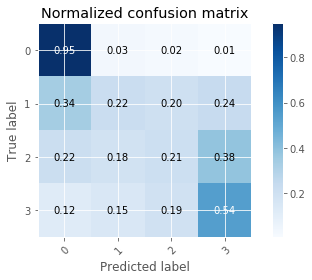

In [6]:
plot_confusion_matrix(y_test, pred, classes=['0','1','2','3'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
df2019 = pd.read_csv("2019 Brownlow Match Data.csv")
df2019 = df2019.iloc[:, :-4]
df2019['Winning_Margin'] = df2019.apply(lambda x: calculate_margin(x), axis=1)
df2019 = df2019.iloc[:, 10:]
df2019.shape

X = df2019.drop([
    'Contested_Possessions', # values not recorded in 2012 data
    'Uncontested_Possessions' # values not recorded in 2012 data
], axis=1).values

scaler.transform(X)

array([[ 0.79087563,  0.72989979,  0.92789743, ...,  0.34319166,
         0.25858648, -1.02282043],
       [ 0.04171825, -0.56849788, -0.32243557, ...,  0.17160679,
        -0.22986462, -1.02282043],
       [ 1.72732236, -0.75398326,  0.58689752, ...,  0.08581436,
         0.80809397, -1.02282043],
       ...,
       [-0.89472847, -0.93946864, -1.11810202, ...,  0.42898409,
        -0.96254127, -1.29511321],
       [-1.45659651, -0.75398326, -1.34543529, ..., -0.08577051,
        -1.51204876, -1.29511321],
       [ 0.41629694,  0.91538517,  0.81423079, ..., -0.51473267,
         0.31964287, -1.29511321]])

In [8]:
probs = lrc.predict_proba(X)
hard_pred = lrc.predict(X)

In [9]:
df2019_predictions = pd.read_csv("2019 Brownlow Match Data.csv")
df2019_predictions['Predicted_Votes'] = hard_pred.tolist()

In [10]:
# Group by player and sort form high votes to low
results = pd.DataFrame(data = df2019_predictions.groupby(['Year','player_name','Team'])['Predicted_Votes'].sum())
results = results.reset_index()
results = results.sort_values('Predicted_Votes', ascending=False);

# Display the top 20 predicted vote getters for 2016
results.head(n=20)

,Year,player_name,Team,Predicted_Votes
9,2019,Adam Treloar,COLL,40.0
494,2019,Patrick Dangerfield,GEEL,35.0
242,2019,Jack Macrae,WB,34.0
461,2019,Nat Fyfe,FRE,33.0
23,2019,Andrew Gaff,WCE,30.0
81,2019,Brodie Grundy,COLL,30.0
348,2019,Josh Dunkley,WB,29.0
493,2019,Patrick Cripps,CARL,29.0
60,2019,Brad Crouch,ADEL,28.0
432,2019,Matt Crouch,ADEL,27.0


In [54]:
df2019_predictions['prediction0'] = probs[:,0] # Probably not needed
df2019_predictions['prediction1'] = probs[:,1]
df2019_predictions['prediction2'] = probs[:,2]
df2019_predictions['prediction3'] = probs[:,3]

In [55]:
df2019_predictions.to_csv('2019LogisticRegression.csv')